In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Data(Dataset):
  def __init__(self, filepath):
    self.img, self.lbl = torch.load(filepath)
    self.img = (self.img).view(-1,28**2)/255
    self.lbl = F.one_hot(self.lbl, 10).to(float)
  def __len__(self):
    return self.img.shape[0]
  def __getitem__(self,idx):
    return self.img[idx],self.lbl[idx]

In [ ]:
tr_ds = Data("/content/drive/MyDrive/training.pt") # Training Data
tr_dl = DataLoader(tr_ds,5)
tst_ds = torch.load("/content/drive/MyDrive/test.pt")

In [ ]:
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.M1 = nn.Linear(28**2,100)
    self.M2 = nn.Linear(100,50)
    self.M3 = nn.Linear(50,10)
    self.R = nn.ReLU()
  def forward(self,x):
    x = self.M3(self.R(self.M2(self.R(self.M1(x)))))
    return x.squeeze()

In [ ]:
def train(dl, f, n_epochs):
  opt = SGD(f.parameters(), lr=0.01)
  L = nn.CrossEntropyLoss()
  losses = []
  epochs = []
  for epoch in range(n_epochs):
    N = len(dl)
    for i, (x, y) in enumerate(dl):
      opt.zero_grad()
      loss_val = L(f(x), y)
      loss_val.backward()
      opt.step()
      epochs.append(epoch+i/N)
      losses.append(loss_val.item())
  return np.array(epochs), np.array(losses) 

In [ ]:
f = net()
epoch_data, loss_data = train(tr_dl, f, 20)

Text(0, 0.5, 'Loss')

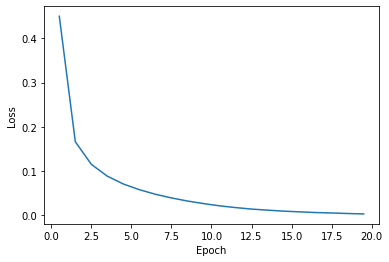

In [ ]:
plt.plot(epoch_data.reshape(20,-1).mean(axis=1), loss_data.reshape(20,-1).mean(axis=1))
plt.xlabel("Epoch")
plt.ylabel("Loss")